In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from data_processing import *

# **Khởi tạo và Đọc dữ liệu thô**
Sử dụng thư viện `NumPy` để đọc dữ liệu từ file CSV.
* **Lưu ý:** Dữ liệu ban đầu được đọc dưới dạng chuỗi (`dtype=str`) để đảm bảo không bị lỗi format.
* **Xử lý sơ bộ:** Tách header và loại bỏ các ký tự thừa (như dấu ngoặc kép) trong tên cột.

In [32]:
file_path = "../data/raw/BankChurners.csv"

with open(file_path, "r") as f:
    header_line = f.readline().strip()

raw_col_names = header_line.split(",")
col_names = [c.strip('"') for c in raw_col_names]

print("Tổng số cột ban đầu:", len(col_names))
print("Tên cột ban đầu:")
print(col_names)

data_raw = np.genfromtxt(
    file_path, 
    delimiter=",", 
    dtype=str,
    skip_header=1
)
print("Kích thước dữ liệu ban đầu:", data_raw.shape)

Tổng số cột ban đầu: 23
Tên cột ban đầu:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
Kích thước dữ liệu ban đầu: (10127, 23)


# **Làm sạch dữ liệu ban đầu (Data Cleaning)**
Thực hiện các bước tiền xử lý cơ bản:
1.  **Slicing:** Loại bỏ 2 cột cuối cùng (Naive Bayes Classifiers). Đây là các chỉ số nội bộ không được dùng làm input cho mô hình dự đoán (tránh rò rỉ dữ liệu - data leakage).
2.  **String Stripping:** Loại bỏ hoàn toàn dấu ngoặc kép `"` bao quanh các giá trị để chuẩn hóa dữ liệu.

In [33]:
data = data_raw[:, :-2]
col_names = col_names[:-2]

data = data.astype(str)
data = np.char.strip(np.char.strip(data, '"'))

print("Kích thước dữ liệu sau khi loại bỏ 2 cột cuối:", data.shape)
print("Tên cột sau khi loại bỏ 2 cột cuối:")
print(col_names)
print("5 dòng dữ liệu đầu tiên:")
first_5_rows = data[:5, :]
for row in first_5_rows:
    print(' | '.join(str(x) for x in row))

Kích thước dữ liệu sau khi loại bỏ 2 cột cuối: (10127, 21)
Tên cột sau khi loại bỏ 2 cột cuối:
['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
5 dòng dữ liệu đầu tiên:
768805383 | Existing Customer | 45 | M | 3 | High School | Married | $60K - $80K | Blue | 39 | 5 | 1 | 3 | 12691 | 777 | 11914 | 1.335 | 1144 | 42 | 1.625 | 0.061
818770008 | Existing Customer | 49 | F | 5 | Graduate | Single | Less than $40K | Blue | 44 | 6 | 1 | 2 | 8256 | 864 | 7392 | 1.541 | 1291 | 33 | 3.714 | 0.105
713982108 | Existing Customer | 51 | M | 3 | Graduate | Married | $80K - $120K | Blue | 36 | 4 | 1 | 0 | 3418 | 0 | 3418 | 2.594 | 1887 | 20 | 

# **Tự động phân loại biến (Feature Typing)**
* Định nghĩa danh sách các giá trị lỗi/thiếu: `Unknown`, `?`, `NA`.
* **Logic:** Thử ép kiểu từng cột sang `float`.
    * Nếu thành công $\rightarrow$ **Numeric Variable**.
    * Nếu thất bại (gặp lỗi ValueError) $\rightarrow$ **Categorical Variable**.

In [34]:
missing_tokens = {"", "Unknown", "unknown", "?", "NA"}

numeric_cols = []
categorical_cols = []

numeric_cols , categorical_cols = feature_typing(col_names, data)

print("Numeric columns:")
print(numeric_cols)
print("\nCategorical columns:")
print(categorical_cols)


Numeric columns:
['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


# **Kiểm tra dữ liệu bị thiếu (Missing Values)**
Kiểm tra số lượng các giá trị nằm trong danh sách "Missing tokens" (`Unknown`, `NA`, `?`) trên từng cột.
> **Lưu ý:** Việc quyết định xử lý các giá trị "Unknown" (gán nhãn mới hay thay thế bằng Mode/Mean) sẽ dựa trên tỷ lệ phần trăm xuất hiện ở bước này.

In [35]:
print("Missing values per column\n")

for j, name in enumerate(col_names):
    col = data[:, j]
    col = np.char.strip(col)
    mask_missing = np.isin(col, list(missing_tokens))
    n_missing = mask_missing.sum()
    print(f"{name:25s}: {n_missing}")


Missing values per column

CLIENTNUM                : 0
Attrition_Flag           : 0
Customer_Age             : 0
Gender                   : 0
Dependent_count          : 0
Education_Level          : 1519
Marital_Status           : 749
Income_Category          : 1112
Card_Category            : 0
Months_on_book           : 0
Total_Relationship_Count : 0
Months_Inactive_12_mon   : 0
Contacts_Count_12_mon    : 0
Credit_Limit             : 0
Total_Revolving_Bal      : 0
Avg_Open_To_Buy          : 0
Total_Amt_Chng_Q4_Q1     : 0
Total_Trans_Amt          : 0
Total_Trans_Ct           : 0
Total_Ct_Chng_Q4_Q1      : 0
Avg_Utilization_Ratio    : 0


# **Kiểm tra trùng lặp (Duplicates Check)**
Sử dụng cột `CLIENTNUM` làm khóa chính (Primary Key).
* So sánh tổng số dòng dữ liệu và số lượng `CLIENTNUM` duy nhất.
* Nếu có sự chênh lệch $\rightarrow$ Cần thực hiện Deduplication (loại bỏ bản ghi trùng).

In [36]:
idx_client = col_names.index("CLIENTNUM")
client_ids = data[:, idx_client]

uniq_ids, counts = np.unique(client_ids, return_counts=True)
n_unique = uniq_ids.size

print("Tổng số dòng:", data.shape[0])
print("Số CLIENTNUM unique:", n_unique)
print("Số bản ghi trùng CLIENTNUM:", data.shape[0] - n_unique)


Tổng số dòng: 10127
Số CLIENTNUM unique: 10127
Số bản ghi trùng CLIENTNUM: 0


# **Cardinality Check**

In [37]:
print("Cardinality & loại biến dựa trên số unique")

n_rows = data.shape[0]

for j, name in enumerate(col_names):
    col = data[:, j]
    unique_vals = np.unique(col)
    n_unique = unique_vals.size
    
    if n_unique == n_rows:
        var_type = "ID"
    elif n_unique == 2:
        var_type = "Binary"
    elif n_unique < 20:
        var_type = "Categorical"
    else:
        var_type = "Continuous"
    
    print(f"{name:25s} | unique = {n_unique:5d} | {var_type}")


Cardinality & loại biến dựa trên số unique
CLIENTNUM                 | unique = 10127 | ID
Attrition_Flag            | unique =     2 | Binary
Customer_Age              | unique =    45 | Continuous
Gender                    | unique =     2 | Binary
Dependent_count           | unique =     6 | Categorical
Education_Level           | unique =     7 | Categorical
Marital_Status            | unique =     4 | Categorical
Income_Category           | unique =     6 | Categorical
Card_Category             | unique =     4 | Categorical
Months_on_book            | unique =    44 | Continuous
Total_Relationship_Count  | unique =     6 | Categorical
Months_Inactive_12_mon    | unique =     7 | Categorical
Contacts_Count_12_mon     | unique =     7 | Categorical
Credit_Limit              | unique =  6205 | Continuous
Total_Revolving_Bal       | unique =  1974 | Continuous
Avg_Open_To_Buy           | unique =  6813 | Continuous
Total_Amt_Chng_Q4_Q1      | unique =  1158 | Continuous
Total_Trans_A

# **Phân tích thống kê mô tả (Descriptive Statistics)**
Tính toán các chỉ số thống kê cơ bản cho các biến số (`Numeric features`):
* **Central Tendency:** Mean (Trung bình), Median (Trung vị - 50%).
* **Dispersion:** Std (Độ lệch chuẩn), Min, Max.
* **Distribution:** Các mốc phân vị 25% (Q1) và 75% (Q3) giúp hình dung độ trải của dữ liệu.

In [38]:
numeric_features = [c for c in numeric_cols if c != "CLIENTNUM" and c in col_names]

print("Numeric features dùng để phân tích:")
print(numeric_features)

def describe_numeric(values):
    return {
        "mean": float(values.mean()),
        "std": float(values.std()),
        "min": float(values.min()),
        "25%": float(np.percentile(values, 25)),
        "50%": float(np.percentile(values, 50)),
        "75%": float(np.percentile(values, 75)),
        "max": float(values.max())
    }

print("\nThống kê mô tả cho các biến số numeric")
for name in numeric_features:
    j = col_names.index(name)
    col_str = data[:, j]
    
    # Bỏ missing trước khi ép float
    mask_missing = np.isin(col_str, list(missing_tokens))
    col_num = col_str[~mask_missing].astype(float)
    
    desc = describe_numeric(col_num)
    print(f"\n{name}")
    for k, v in desc.items():
        print(f"  {k:>4s} : {v:.3f}")


Numeric features dùng để phân tích:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Thống kê mô tả cho các biến số numeric

Customer_Age
  mean : 46.326
   std : 8.016
   min : 26.000
   25% : 41.000
   50% : 46.000
   75% : 52.000
   max : 73.000

Dependent_count
  mean : 2.346
   std : 1.299
   min : 0.000
   25% : 1.000
   50% : 2.000
   75% : 3.000
   max : 5.000

Months_on_book
  mean : 35.928
   std : 7.986
   min : 13.000
   25% : 31.000
   50% : 36.000
   75% : 40.000
   max : 56.000

Total_Relationship_Count
  mean : 3.813
   std : 1.554
   min : 1.000
   25% : 3.000
   50% : 4.000
   75% : 5.000
   max : 6.000

Months_Inactive_12_mon
  mean : 2.341
   std : 1.011
   min : 0.000
   25% : 2.000
   50% : 2.000
   75% : 3.000
   ma

# **Phát hiện điểm bất thường (Outliers Detection)**
Sử dụng phương pháp **IQR (Interquartile Range)** để xác định outliers.
Công thức xác định biên:
$$IQR = Q3 - Q1$$
$$Lower Bound = Q1 - 1.5 \times IQR$$
$$Upper Bound = Q3 + 1.5 \times IQR$$

Các điểm dữ liệu nằm ngoài khoảng `[Lower Bound, Upper Bound]` được coi là Outliers và sẽ được trực quan hóa bằng biểu đồ **Boxplot**.

In [39]:
def count_outliers_IQR(values):
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return np.sum((values < lower) | (values > upper))

print("Số lượng outliers theo IQR")
for name in numeric_features:
    j = col_names.index(name)
    col = data[:, j].astype(float)
    n_out = count_outliers_IQR(col)
    print(f"{name:25s}: {n_out} outliers")


Số lượng outliers theo IQR
Customer_Age             : 2 outliers
Dependent_count          : 0 outliers
Months_on_book           : 386 outliers
Total_Relationship_Count : 0 outliers
Months_Inactive_12_mon   : 331 outliers
Contacts_Count_12_mon    : 629 outliers
Credit_Limit             : 984 outliers
Total_Revolving_Bal      : 0 outliers
Avg_Open_To_Buy          : 963 outliers
Total_Amt_Chng_Q4_Q1     : 396 outliers
Total_Trans_Amt          : 896 outliers
Total_Trans_Ct           : 2 outliers
Total_Ct_Chng_Q4_Q1      : 394 outliers
Avg_Utilization_Ratio    : 0 outliers


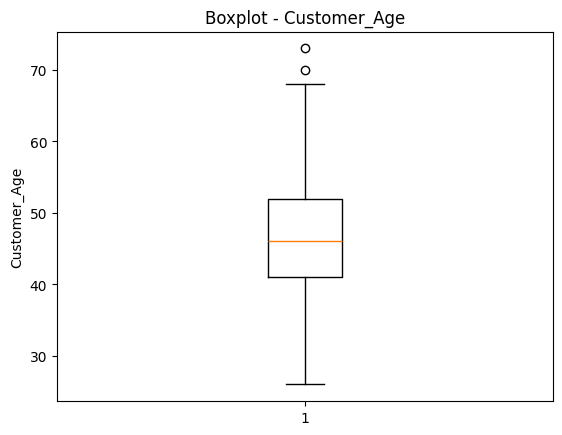

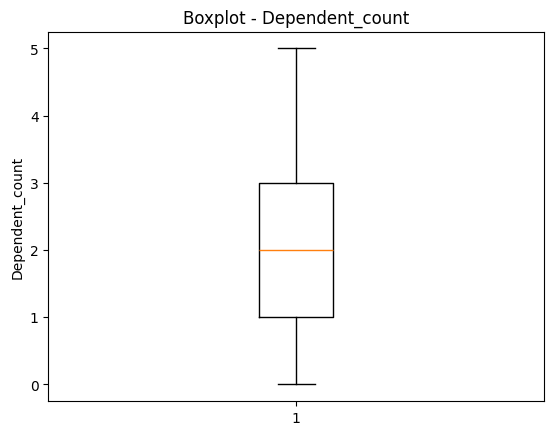

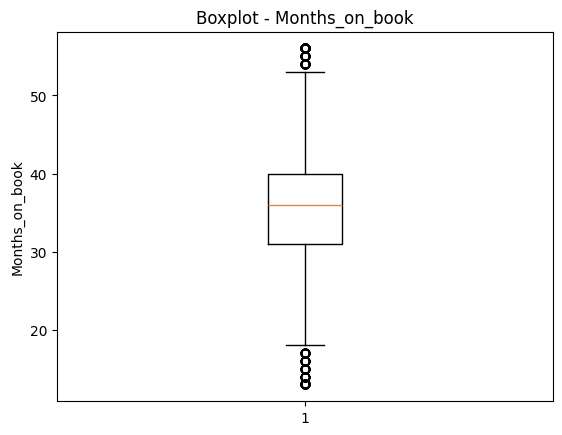

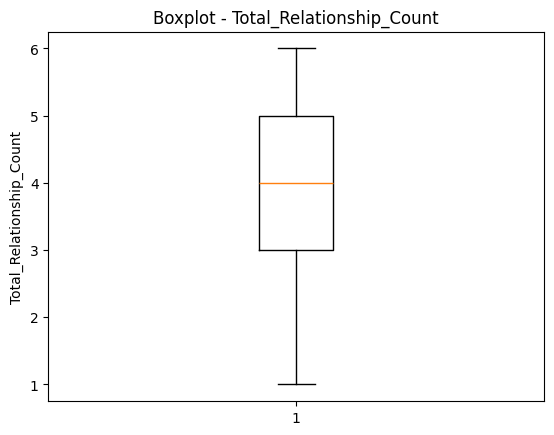

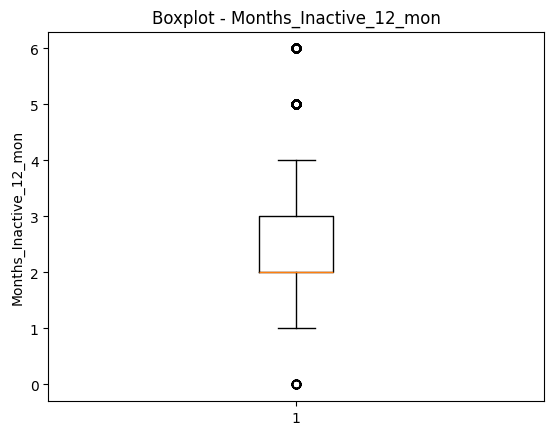

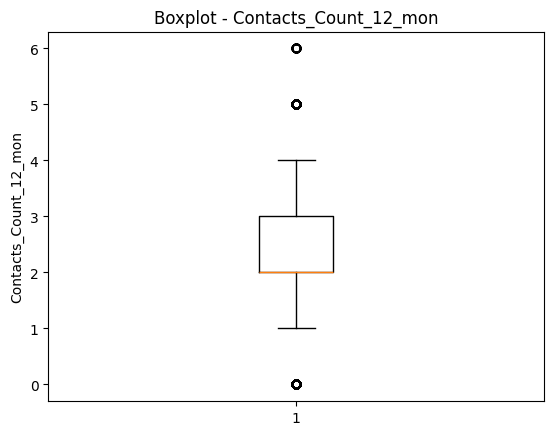

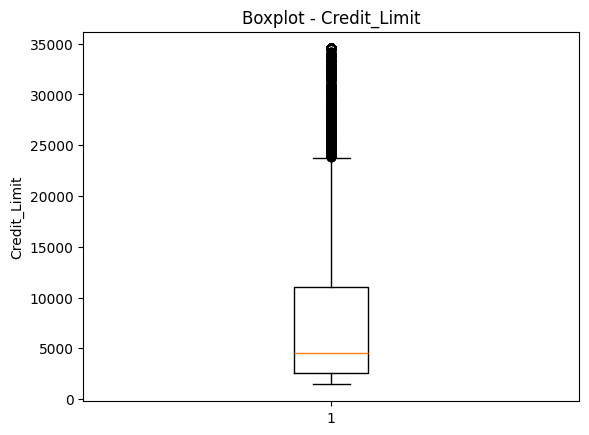

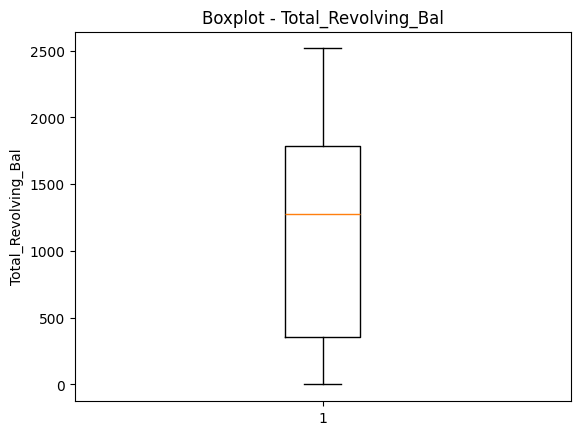

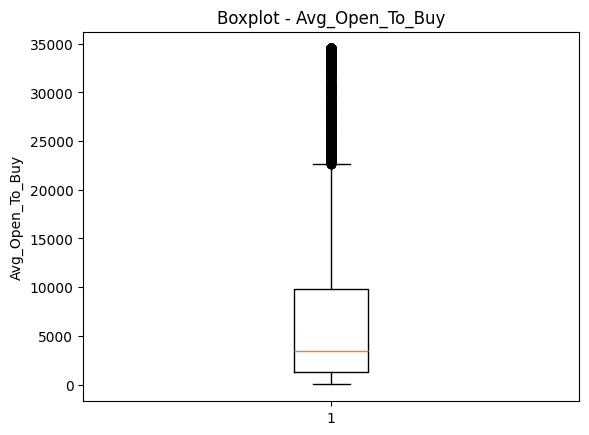

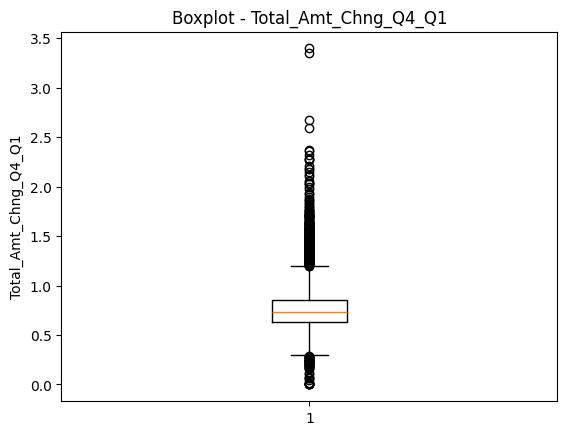

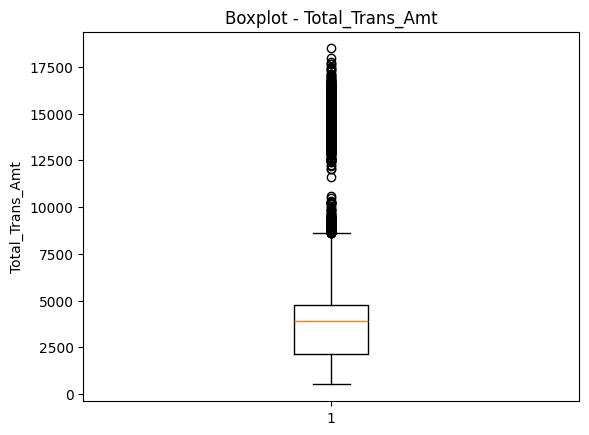

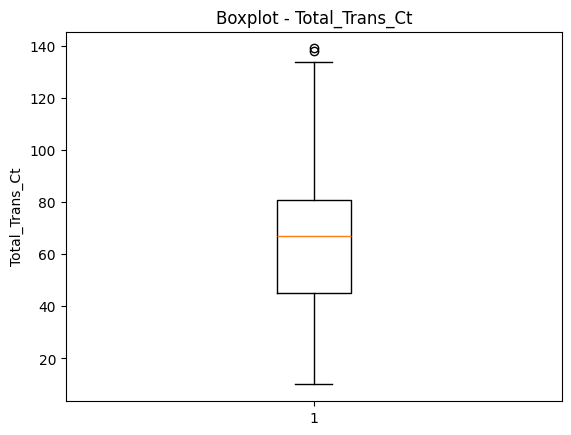

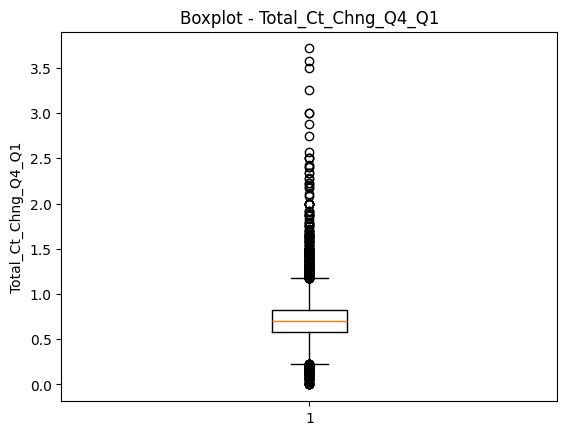

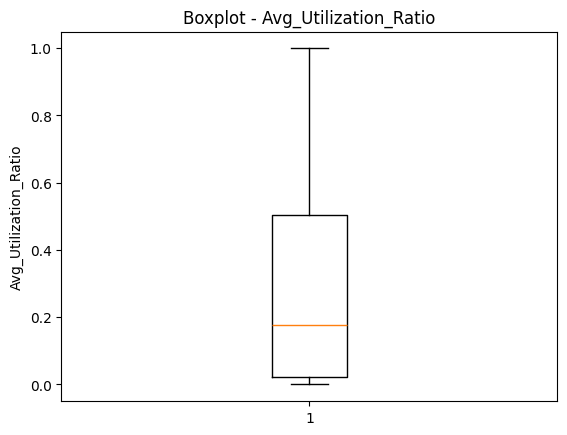

In [40]:
for name in numeric_features:
    j = col_names.index(name)
    col = data[:, j].astype(float)
    
    plt.figure()
    plt.boxplot(col)
    plt.title(f"Boxplot - {name}")
    plt.ylabel(name)
    plt.show()

# **Phân tích biến mục tiêu (Target Analysis)**
Kiểm tra phân phối của biến `Attrition_Flag`:
* **Existing Customer:** Khách hàng hiện tại.
* **Attrited Customer:** Khách hàng đã rời bỏ.

> **Quan trọng:** Kiểm tra xem dữ liệu có bị **Mất cân bằng (Imbalanced)** không. Nếu tỷ lệ `Attrited` quá thấp (< 20%), cần cân nhắc các chiến lược như Resampling (SMOTE) hoặc sử dụng metric F1-Score thay vì Accuracy.

Phân phối Attrition_Flag
Attrited Customer   :  1627 (16.07%)
Existing Customer   :  8500 (83.93%)


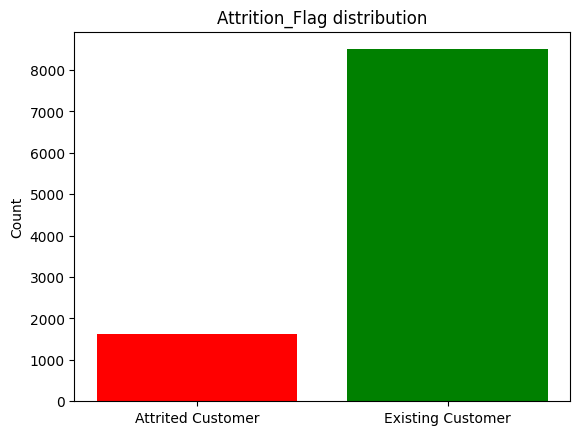

In [41]:
idx_attr = col_names.index("Attrition_Flag")
y_str = data[:, idx_attr]

labels, counts = np.unique(y_str, return_counts=True)
total = counts.sum()

print("Phân phối Attrition_Flag")
for lab, cnt in zip(labels, counts):
    print(f"{lab:20s}: {cnt:5d} ({cnt/total*100:.2f}%)")

plt.bar(labels, counts, color=['red', 'green'])
plt.title("Attrition_Flag distribution")
plt.ylabel("Count")
plt.show()

# **Categorical Analysis**

In [42]:
def print_top_k(col, k=5):
    vals, counts = np.unique(col, return_counts=True)
    idx_sort = np.argsort(-counts)
    vals = vals[idx_sort]
    counts = counts[idx_sort]
    total = counts.sum()
    
    for v, c in zip(vals[:k], counts[:k]):
        print(f"  {v:20s} : {c:5d} ({c/total*100:.2f}%)")

print("Phân tích tần suất các biến phân loại (top 5 giá trị)")
for name in categorical_cols:
    print(f"\n{name}:")
    j = col_names.index(name)
    col = data[:, j]
    print_top_k(col, k=5)


Phân tích tần suất các biến phân loại (top 5 giá trị)

Attrition_Flag:
  Existing Customer    :  8500 (83.93%)
  Attrited Customer    :  1627 (16.07%)

Gender:
  F                    :  5358 (52.91%)
  M                    :  4769 (47.09%)

Education_Level:
  Graduate             :  3128 (30.89%)
  High School          :  2013 (19.88%)
  Unknown              :  1519 (15.00%)
  Uneducated           :  1487 (14.68%)
  College              :  1013 (10.00%)

Marital_Status:
  Married              :  4687 (46.28%)
  Single               :  3943 (38.94%)
  Unknown              :   749 (7.40%)
  Divorced             :   748 (7.39%)

Income_Category:
  Less than $40K       :  3561 (35.16%)
  $40K - $60K          :  1790 (17.68%)
  $80K - $120K         :  1535 (15.16%)
  $60K - $80K          :  1402 (13.84%)
  Unknown              :  1112 (10.98%)

Card_Category:
  Blue                 :  9436 (93.18%)
  Silver               :   555 (5.48%)
  Gold                 :   116 (1.15%)
  Platinum     

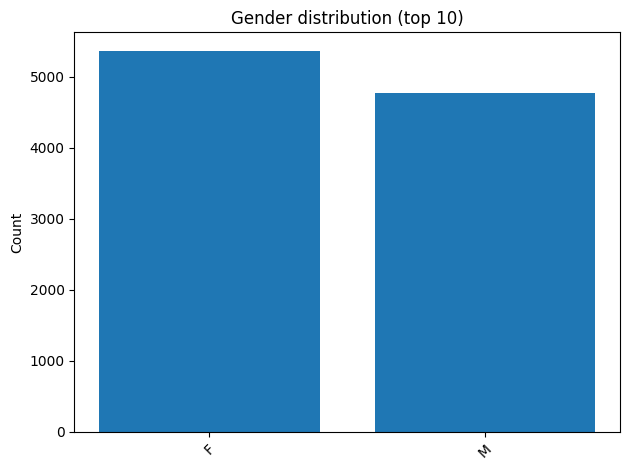

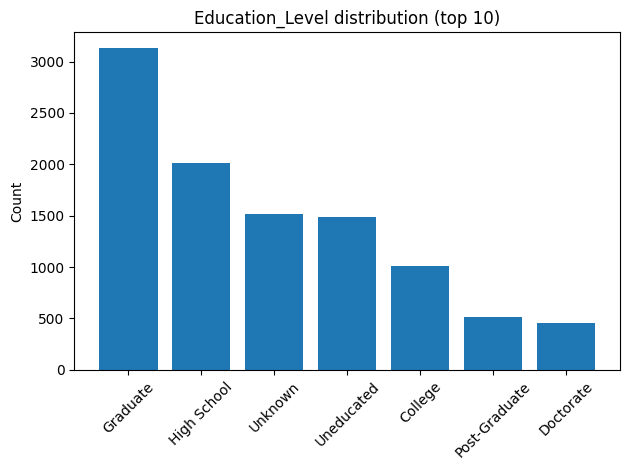

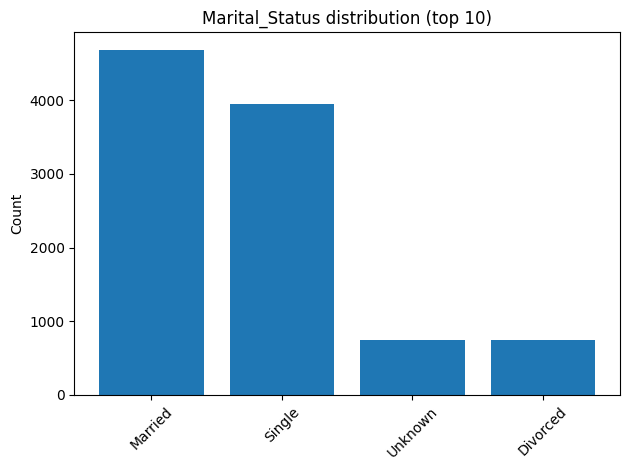

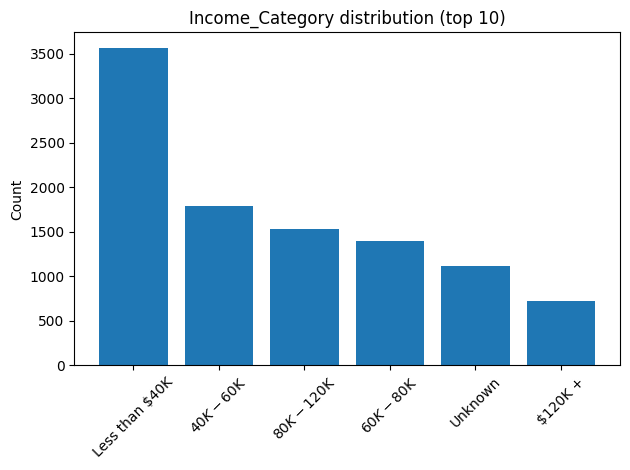

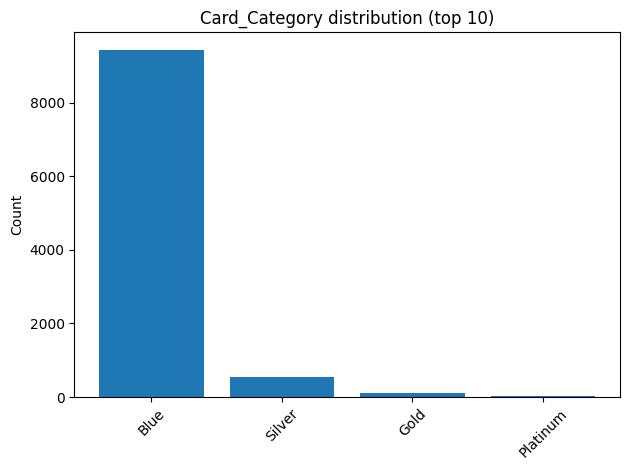

In [43]:
def plot_categorical(name, max_categories=10):
    j = col_names.index(name)
    col = data[:, j]
    vals, counts = np.unique(col, return_counts=True)
    idx_sort = np.argsort(-counts)
    vals = vals[idx_sort][:max_categories]
    counts = counts[idx_sort][:max_categories]
    
    plt.figure()
    plt.bar(vals, counts)
    plt.title(f"{name} distribution (top {max_categories})")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ví dụ vẽ cho một số cột tiêu biểu
for name in ["Gender", "Education_Level", "Marital_Status", "Income_Category", "Card_Category"]:
    if name in categorical_cols:
        plot_categorical(name)


# **Phân phối biến số (Histogram)**
Sử dụng biểu đồ Histogram để quan sát hình dáng phân phối (Distribution Shape):
* **Normal Distribution:** Phân phối hình chuông (ví dụ: Age).
* **Skewed Distribution:** Lệch trái hoặc phải (ví dụ: Credit Limit thường lệch phải).
* **Multimodal:** Phân phối nhiều đỉnh, gợi ý có nhiều nhóm khách hàng con (Sub-groups) trong dữ liệu.

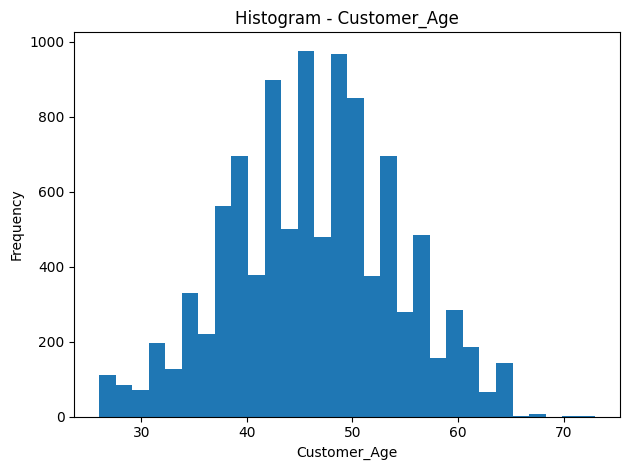

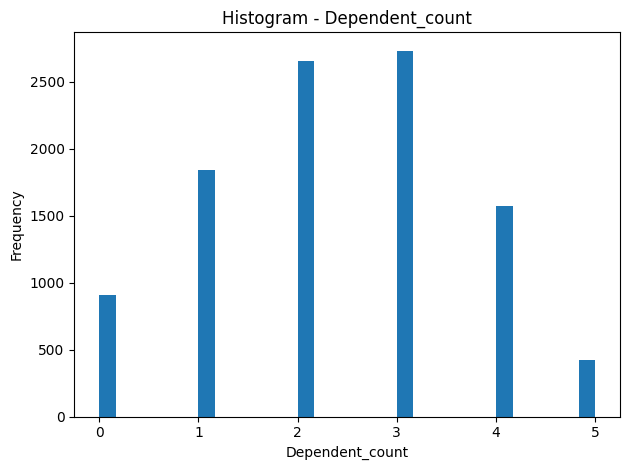

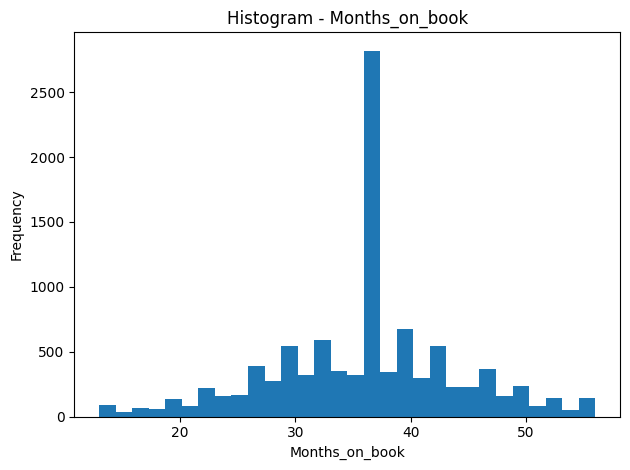

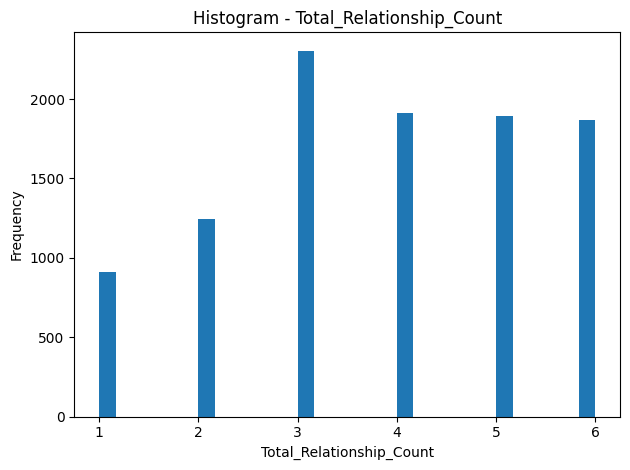

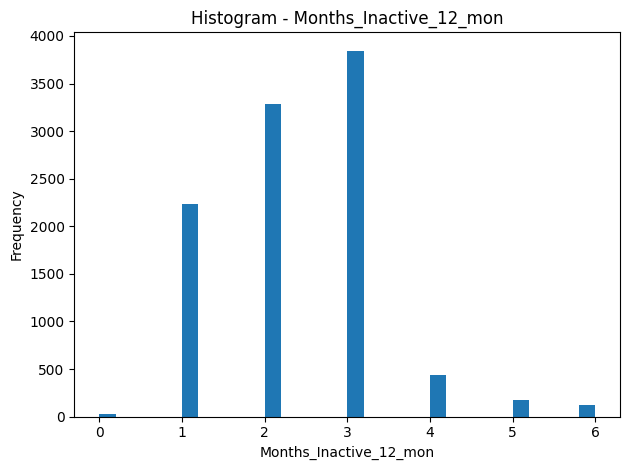

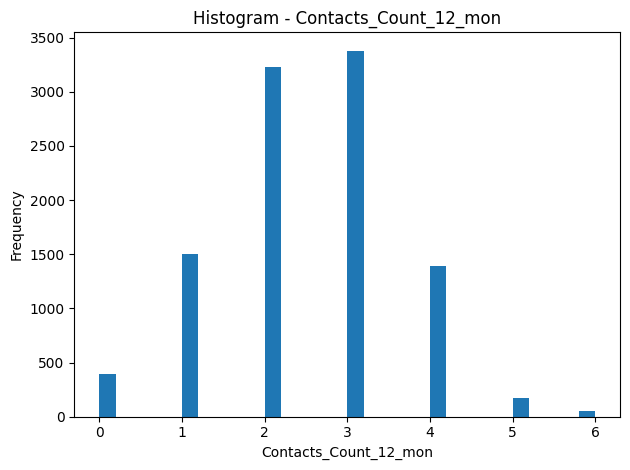

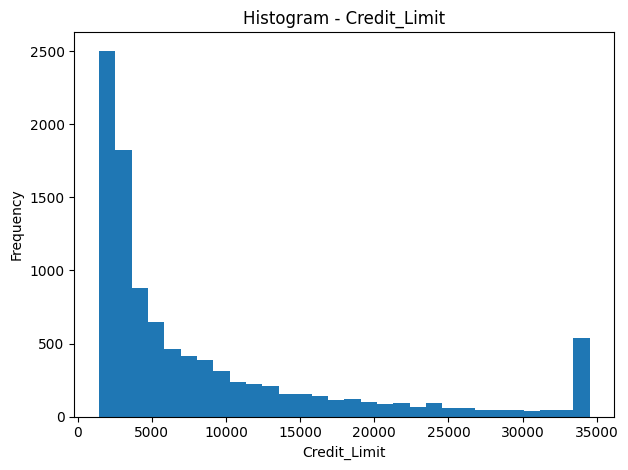

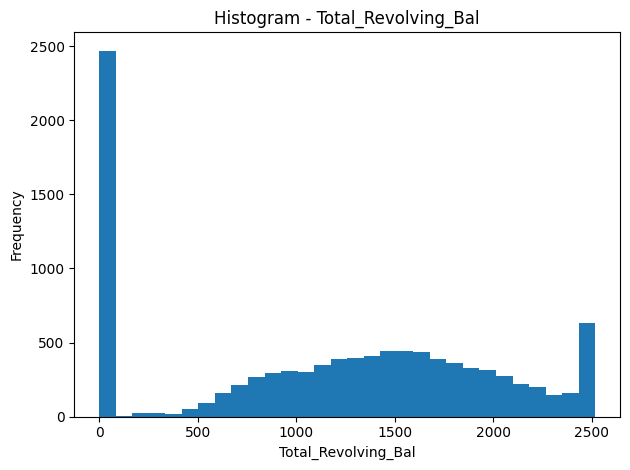

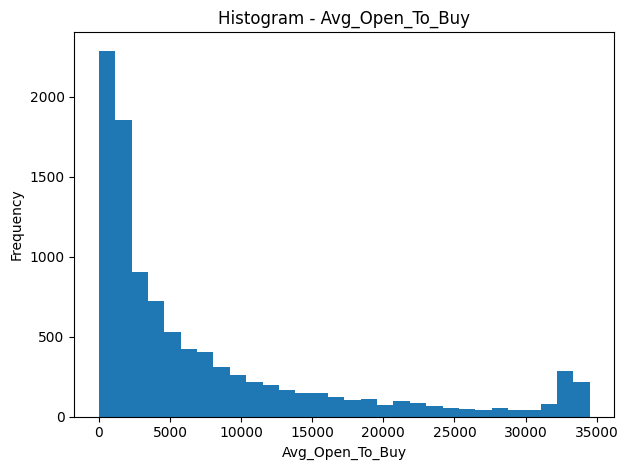

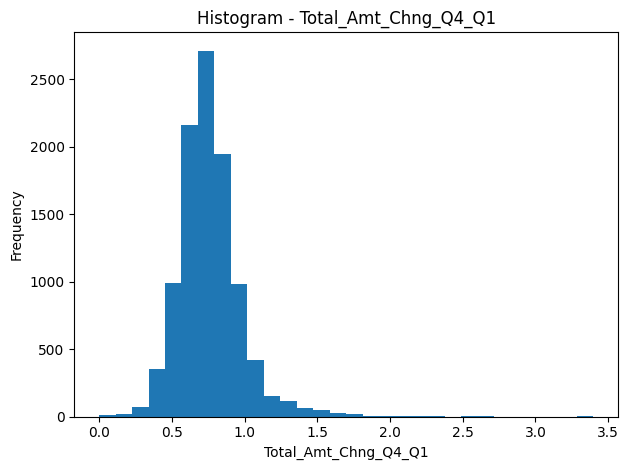

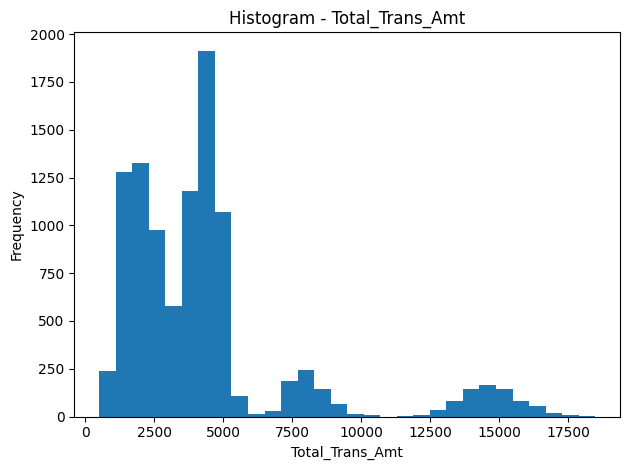

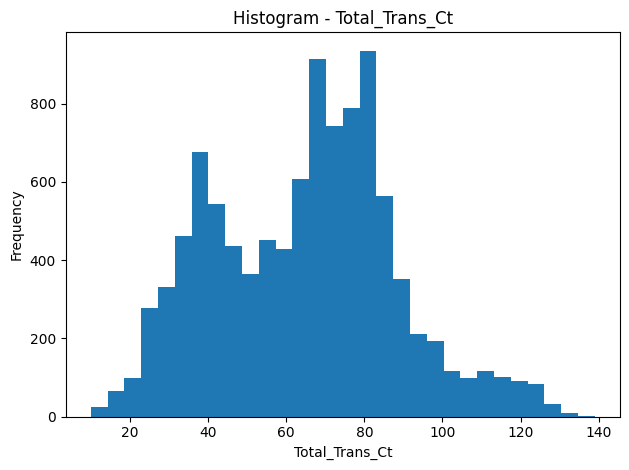

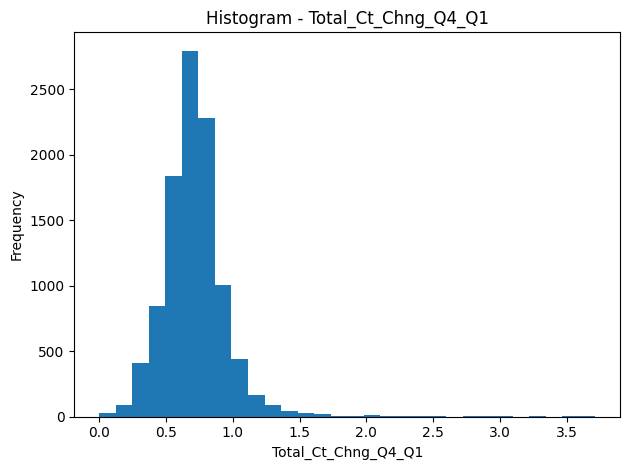

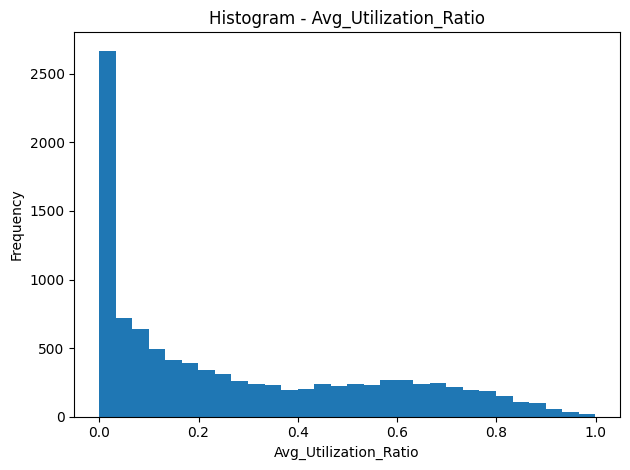

In [44]:
for name in numeric_features:
    j = col_names.index(name)
    col = data[:, j].astype(float)
    
    plt.figure()
    plt.hist(col, bins=30)
    plt.title(f"Histogram - {name}")
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


# **Tương quan với biến mục tiêu (Feature Correlation)**
Tính hệ số tương quan Pearson giữa các biến số và biến mục tiêu (đã được mã hóa: `Attrited`=1, `Existing`=0).

* **Positive Correlation (+):** Giá trị biến tăng $\rightarrow$ Khả năng rời bỏ tăng (ví dụ: Số lần liên hệ phàn nàn).
* **Negative Correlation (-):** Giá trị biến tăng $\rightarrow$ Khả năng rời bỏ giảm (Khách hàng trung thành hơn, ví dụ: Tổng số giao dịch).

Correlation với Attrition_Flag (1 = Attrited)
Total_Trans_Ct           : -0.371
Total_Ct_Chng_Q4_Q1      : -0.290
Total_Revolving_Bal      : -0.263
Contacts_Count_12_mon    : +0.204
Avg_Utilization_Ratio    : -0.178
Total_Trans_Amt          : -0.169
Months_Inactive_12_mon   : +0.152
Total_Relationship_Count : -0.150
Total_Amt_Chng_Q4_Q1     : -0.131
Credit_Limit             : -0.024
Dependent_count          : +0.019
Customer_Age             : +0.018
Months_on_book           : +0.014
Avg_Open_To_Buy          : -0.000


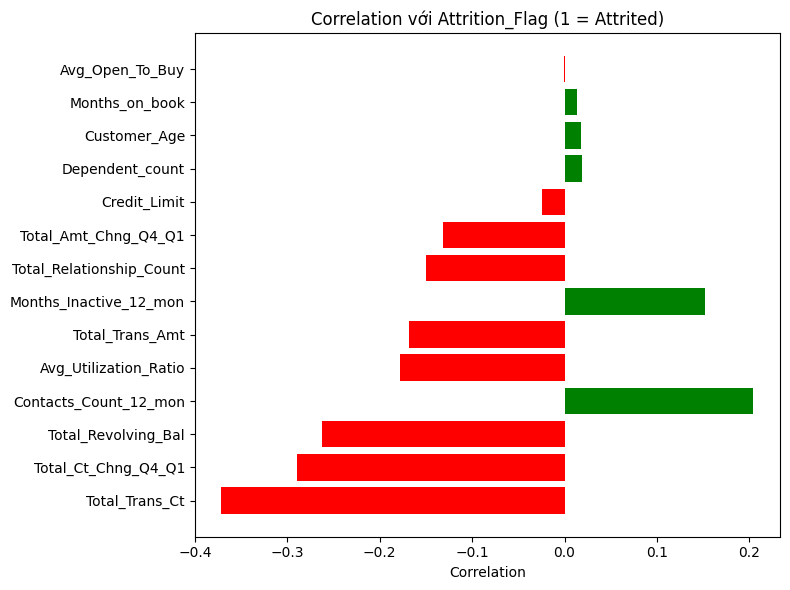

In [45]:
correlations = {}
y = np.where(y_str == "Attrited Customer", 1, 0)

for name in numeric_features:
    j = col_names.index(name)
    col = data[:, j].astype(float)
    
    if col.std() == 0 or y.std() == 0:
        corr = 0.0
    else:
        corr = np.corrcoef(col, y)[0, 1]
    
    correlations[name] = corr

# Sắp xếp theo độ lớn |corr|
corr_sorted = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print("Correlation với Attrition_Flag (1 = Attrited)")
for name, corr in corr_sorted:
    print(f"{name:25s}: {corr:+.3f}")

names = [x[0] for x in corr_sorted]
vals = [x[1] for x in corr_sorted]

plt.figure(figsize=(8, 6))
plt.barh(names, vals , color=['red' if v < 0 else 'green' for v in vals])
plt.title("Correlation với Attrition_Flag (1 = Attrited)")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()



# **Tổng hợp Insight & Câu hỏi từ Dữ liệu**

Dựa trên các biểu đồ và chỉ số thống kê đã thực hiện ở trên (Histogram, Boxplot, Correlation), chúng ta có thể rút ra một số câu hỏi quan trọng như sau:

---

### **1. Yếu tố nào có quan hệ mạnh nhất với việc khách hàng rời bỏ (Churn)?**
**Câu hỏi:** Dựa trên bảng xếp hạng hệ số tương quan (Correlation), biến số nào báo hiệu rõ nhất việc một khách hàng sắp ngừng sử dụng dịch vụ?

Hai biến số có **tương quan âm (negative correlation) mạnh nhất** là:
* `Total_Trans_Ct` (Tổng số lượng giao dịch).
* `Total_Trans_Amt` (Tổng số tiền giao dịch).

> **Kết luận:** Khách hàng càng giao dịch nhiều (cả về số lần và số tiền), khả năng họ rời bỏ càng thấp. Ngược lại, sự sụt giảm trong tần suất sử dụng thẻ là dấu hiệu báo động sớm nhất.

---

### **2. Dữ liệu có bị mất cân bằng (Imbalance) không?**
**Câu hỏi:** Tỷ lệ giữa khách hàng trung thành và khách hàng rời bỏ chênh lệch như thế nào, và điều này ảnh hưởng gì đến việc xây dựng mô hình?

Biểu đồ phân phối `Attrition_Flag` cho thấy sự chênh lệch lớn:
* Đa số dữ liệu là **Existing Customer** (chiếm khoảng 84%).
* Chỉ một phần nhỏ là **Attrited Customer** (chiếm khoảng 16%).

> **Kết luận:** Dữ liệu bị **Mất cân bằng (Imbalanced)**. Khi huấn luyện mô hình, chúng ta không thể chỉ dựa vào độ chính xác (Accuracy) mà cần chú trọng vào các chỉ số như F1-Score hoặc Recall để bắt đúng nhóm khách hàng rời bỏ.

---

### **3. Đặc điểm nhân khẩu học chính của khách hàng là gì?**
**Câu hỏi:** Phần lớn khách hàng của ngân hàng thuộc nhóm thu nhập và trình độ học vấn nào?

Biểu đồ tần suất (Bar Chart) của các biến phân loại cho thấy:
* **Về thu nhập (`Income_Category`):** Nhóm chiếm tỷ trọng lớn nhất là **"Less than $40K"**.
* **Về học vấn (`Education_Level`):** Phần lớn khách hàng có trình độ **Graduate** (Cử nhân).

> **Kết luận:** Phân khúc khách hàng phổ biến nhất tại ngân hàng là nhóm có thu nhập trung bình-thấp và đã tốt nghiệp đại học. Các chiến lược giữ chân khách hàng nên tập trung tối ưu cho nhóm nhân khẩu học này.